<h2>California Housing Price Prediction</h2>

dataset source - https://www.kaggle.com/camnugent/california-housing-prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housingDf = pd.read_csv("housing.csv")
housingDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housingDf.shape

(20640, 10)

In [4]:
housingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housingDf.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Only the "total_bedrooms" attribute has missing values i.e 207 missing values

In [6]:
housingDf["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housingDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


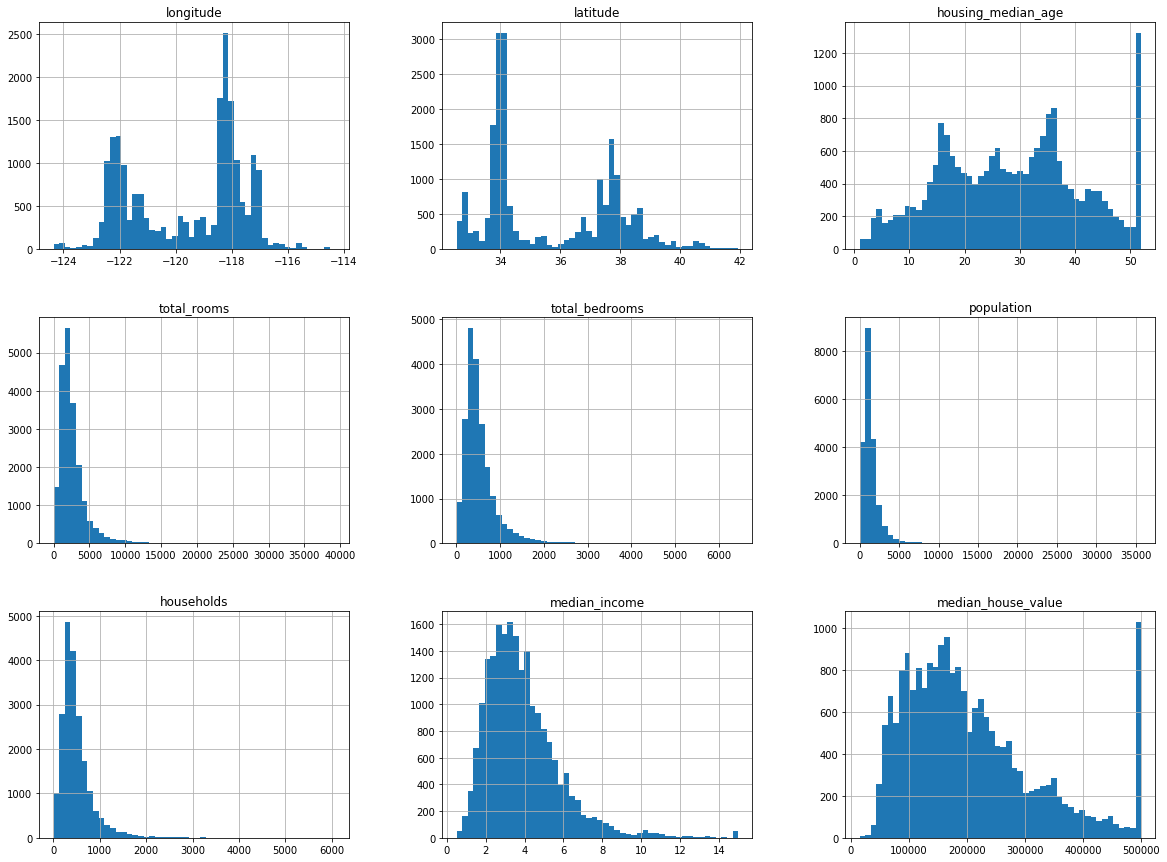

In [8]:
housingDf.hist(bins=50, figsize=(20, 15))
plt.show()

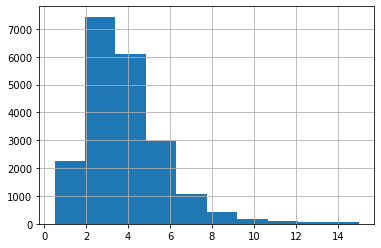

In [9]:
housingDf['median_income'].hist()

In [10]:
# Creating 5 income categories 

housingDf['income_category'] = np.ceil(housingDf['median_income'] / 1.5)

# Putiing all values more than 5th category in 5th category

housingDf['income_category'].where(housingDf['income_category']<5 , other = 5.0 , inplace = True)

In [11]:
housingDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [12]:
housingDf['income_category'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_category, dtype: int64

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in split.split(housingDf, housingDf['income_category']):
    strat_train_set = housingDf.loc[train_index]
    strat_test_set = housingDf.loc[test_index]

In [14]:
# Checking the distribution after stratification

housingDf["income_category"].value_counts() / len(housingDf)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_category, dtype: float64

In [15]:
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_category, dtype: float64

In [16]:
# experimenting: with random sampling now

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housingDf, test_size=0.2, random_state=29)

In [17]:
# Function for comparing the random samples and stratified samples distribution

def income_category_dist (dataframe):
    return dataframe['income_category'].value_counts() / len(dataframe)

Dist_Compare = pd.DataFrame ({
    
    "Original Dist" : income_category_dist(housingDf),
    "Random Sampling Dist" : income_category_dist(test_set),
    "Stratified Sampling Dist" : income_category_dist(strat_test_set)
}).sort_index()

Dist_Compare["random %error"] = 100 * Dist_Compare["Random Sampling Dist"] / Dist_Compare["Original Dist"] - 100
Dist_Compare["strat. %error"] = 100 * Dist_Compare["Stratified Sampling Dist"] / Dist_Compare["Original Dist"] - 100

Dist_Compare

,Original Dist,Random Sampling Dist,Stratified Sampling Dist,random %error,strat. %error
1.0,0.039826,0.042636,0.039729,7.055961,-0.243309
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114583,4.360711,0.127011


In [18]:
for items in (strat_train_set, strat_test_set):
    items.drop("income_category", axis=1, inplace=True)

In [19]:
housingDf = strat_train_set.copy()

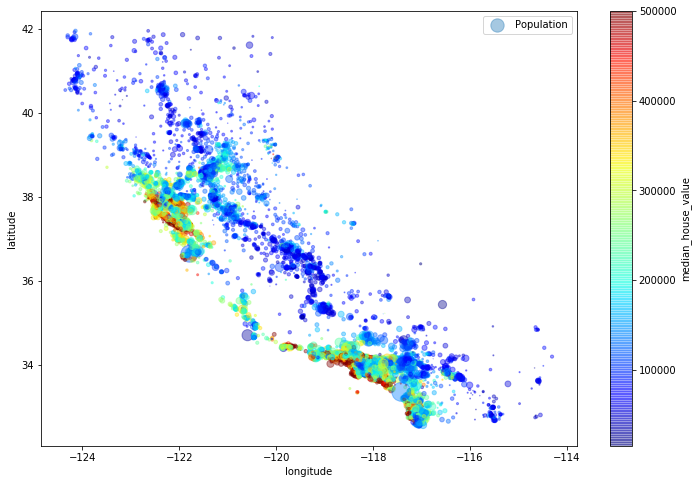

In [20]:
housingDf.plot(kind = "scatter" , x = "longitude" , y = "latitude" , alpha = 0.4,
              s = housingDf["population"]/100 , label = "Population",figsize = (12,8),
              c = "median_house_value" , cmap = plt.get_cmap("jet") , sharex = False)
plt.legend()

In [21]:
# Visualization on the actual map of California .

In [22]:
import matplotlib.image as mpimg

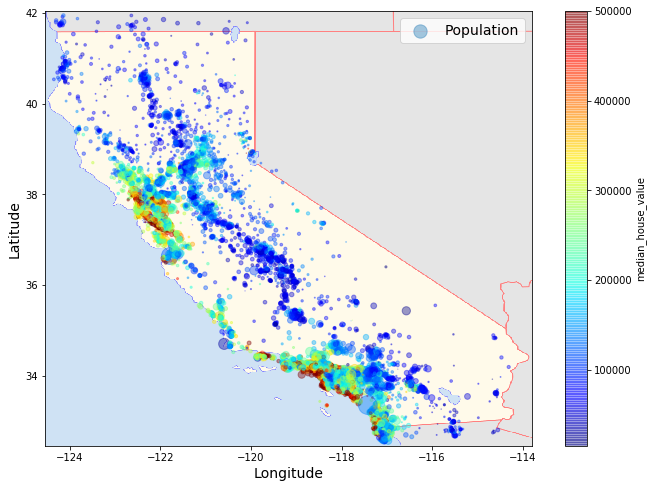

In [23]:
a = housingDf.plot(kind = "scatter" , x = "longitude" , y = "latitude" , alpha = 0.4,
              s = housingDf["population"]/100 , label = "Population",figsize = (12,8),
              c = "median_house_value" , cmap = plt.get_cmap("jet") , sharex = False)

img = mpimg.imread("California_blank_map.png")

plt.imshow(img , extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

<h2>Looking for Correlations</h2>

(Pearson's Distance Correlation equation)

In [24]:
corr_matrix = housingDf.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

## Creating custom features

In [25]:
housingDf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7771,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383,166200.0,<1H OCEAN
9352,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834,500001.0,NEAR BAY
18657,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777,263800.0,NEAR OCEAN
4873,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375,38800.0,<1H OCEAN
12350,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399,94800.0,INLAND


In [26]:
housingDf["bedrooms_per_room"] = housingDf["total_bedrooms"] / housingDf["total_rooms"]
housingDf["population_per_household"] = housingDf["population"] / housingDf["households"]
housingDf["rooms_per_household"] = housingDf["total_rooms"]/housingDf["households"]

In [27]:
corr_matrix = housingDf.corr()

corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_room          -0.253572
Name: median_house_value, dtype: float64

The "bedrooms_per_room " attribute is inversely correlated to the "median_house_value " . Therefore the less the number of bed rooms to room ratio , the more the price .

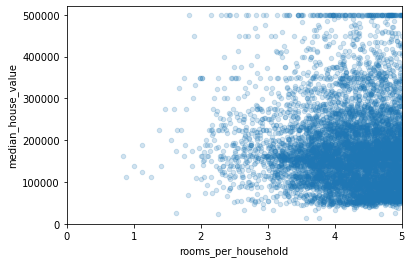

In [28]:
housingDf.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [29]:
housingDf.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574691,35.642798,28.655220,2622.124879,535.192672,1418.447372,496.865492,3.870355,206418.759872,0.212973,3.103875,5.434516
std,2.005064,2.142773,12.535491,2171.310387,421.124910,1137.484934,382.194550,1.903633,115088.961605,0.058323,11.603193,2.520743
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.000000,279.000000,2.559725,119175.000000,0.175448,2.433980,4.443478
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.532750,179650.000000,0.202964,2.817596,5.230221
75%,-118.010000,37.720000,37.000000,3121.250000,641.000000,1715.000000,599.000000,4.739375,264700.000000,0.239351,3.273248,6.056361
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


## Preparing data for Machine Learning Algorithims

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [31]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        163
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [32]:
# Handling missing values using custom imputer 

sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median , inplace = True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN


In [33]:
sample_incomplete_rows.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [34]:
# Handling missing values using Scikit Learns Imputer 

from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(strategy="median")

In [35]:
housing_num = housing.drop("ocean_proximity", axis=1)

Imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [36]:
Imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [37]:
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [38]:
X = Imputer.transform(housing_num)

In [39]:
Housing_Transformed = pd.DataFrame(X , columns = housing_num.columns)

In [40]:
Housing_Transformed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [41]:
Housing_Transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
4,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399


In [42]:
# Handling Categorical Variables

#housing_category = housing.select_dtypes(include=["O"]) #- Performing one hot encoding using Pandas Factorize (Will work only on series and not an Data Frames)
housing_category = housing["ocean_proximity"]
housing_category.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [43]:
# Performing one hot encoding using Pandas Factorize (Will work only on series and not an Data Frames) 

housing_category_codes, housing_categories = housing_category.factorize()

In [44]:
housing_category_codes[:8] # Ont hot codes

array([0, 1, 2, 0, 3, 2, 0, 2], dtype=int64)

In [45]:
housing_categories # Unique Values

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [46]:
# Using Sklearns One Hot Encoder 

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
housing_category_OneHot = enc.fit_transform(housing_category.values.reshape(-1,1))

In [47]:
housing_category_OneHot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
housing_category_OneHot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

## Custom Transformations

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing to do here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [50]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_custom_attribs = attr_adder.transform(housing.values)

In [51]:
housing_custom_attribs = pd.DataFrame(housing_custom_attribs, columns=list(housing.columns)+["rooms_per_household", 
                                                                                           "population_per_household"])
housing_custom_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


## Setting up pipeline for pre-processing

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
    
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [53]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attibute_names = attribute_names
        
    def fit(self, X, y=None):
        return self # do nothing
    
    def transform(self, X, y=None):
        return X[self.attibute_names].values

In [54]:
# complete Pipeline

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline =Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [55]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [56]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

## Selecting and training models

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [59]:
print("Prediction: ", lin_reg.predict(some_data_prepared))
print("Actual Labels: ", list(some_labels))

Prediction:  [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual Labels:  [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [60]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [62]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-scores)

In [64]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("std deviation: ", scores.std())
    
    
display_scores(tree_rmse_scores)

scores:  [70153.46652284 68859.12588817 68191.66553454 71840.07229142
 69018.49082755 67165.77551313 70655.46608283 70287.09341742
 67797.16425544 69555.18504564]
mean:  69352.3505378991
std deviation:  1354.4437901398862


In [65]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

scores:  [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean:  68243.17261737352
std deviation:  2500.7262162919783


In [66]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)

In [67]:
housing_pred = forest_reg.predict(housing_prepared)

forest_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

scores:  [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean:  68243.17261737352
std deviation:  2500.7262162919783


## Fine Tuning Model

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [69]:
# to get the best combination of hyperparameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [70]:
# to get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

62602.26555045729 {'max_features': 2, 'n_estimators': 3}
54632.70072930125 {'max_features': 2, 'n_estimators': 10}
52448.697874788166 {'max_features': 2, 'n_estimators': 30}
59642.25005133065 {'max_features': 4, 'n_estimators': 3}
52107.041906314436 {'max_features': 4, 'n_estimators': 10}
49961.45352624978 {'max_features': 4, 'n_estimators': 30}
59065.6867493609 {'max_features': 6, 'n_estimators': 3}
51159.29771581027 {'max_features': 6, 'n_estimators': 10}
49355.05601495097 {'max_features': 6, 'n_estimators': 30}
57630.28195896384 {'max_features': 8, 'n_estimators': 3}
51451.535139363776 {'max_features': 8, 'n_estimators': 10}
49482.81698573258 {'max_features': 8, 'n_estimators': 30}
62094.01010097671 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53684.76348842282 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59632.05572415237 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51388.255121402915 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [72]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.163237,0.011838,0.006535,0.001847,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.750295e+09,-4.034574e+09,-3.637468e+09,-4.044719e+09,-4.128162e+09,-3.919044e+09,1.900699e+08,18
1,0.499630,0.006113,0.020418,0.000388,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.033043e+09,-2.807541e+09,-3.000811e+09,-2.954547e+09,-3.127717e+09,-2.984732e+09,1.052093e+08,11
2,1.494891,0.025703,0.056336,0.003504,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.701835e+09,-2.722674e+09,-2.715962e+09,-2.761516e+09,-2.852343e+09,-2.750866e+09,5.445764e+07,9
3,0.249990,0.006448,0.006607,0.002096,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.584705e+09,-3.322905e+09,-3.472318e+09,-3.740774e+09,-3.665288e+09,-3.557198e+09,1.471312e+08,16
4,0.811940,0.014768,0.019184,0.001359,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.714081e+09,-2.724291e+09,-2.622502e+09,-2.689097e+09,-2.825748e+09,-2.715144e+09,6.569488e+07,8
5,2.403408,0.019453,0.054475,0.000365,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.436830e+09,-2.418861e+09,-2.498518e+09,-2.526039e+09,-2.600485e+09,-2.496147e+09,6.523386e+07,3
6,0.335820,0.011625,0.008350,0.000498,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.501828e+09,-3.220939e+09,-3.630789e+09,-3.455507e+09,-3.634713e+09,-3.488755e+09,1.513139e+08,14
7,1.100150,0.013734,0.018904,0.002231,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.736164e+09,-2.519199e+09,-2.578638e+09,-2.593787e+09,-2.658581e+09,-2.617274e+09,7.416776e+07,4
8,3.340009,0.044918,0.055947,0.001806,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.437952e+09,-2.319249e+09,-2.422880e+09,-2.409645e+09,-2.589883e+09,-2.435922e+09,8.738575e+07,1
9,0.422351,0.005919,0.006606,0.001867,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.507307e+09,-3.236924e+09,-3.381897e+09,-3.004138e+09,-3.475981e+09,-3.321249e+09,1.843408e+08,12


In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distibs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

rf_reg = RandomForestRegressor(random_state=29)

rnd_search = RandomizedSearchCV(rf_reg, param_distributions=params_distibs, n_iter=10, 
                                cv=5, scoring="neg_mean_squared_error", random_state=29)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [74]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48554.90771026735 {'max_features': 6, 'n_estimators': 116}
49443.4111089091 {'max_features': 5, 'n_estimators': 35}
53570.270118359476 {'max_features': 1, 'n_estimators': 97}
50902.04894946984 {'max_features': 2, 'n_estimators': 114}
53580.197475159825 {'max_features': 1, 'n_estimators': 98}
48632.86288202718 {'max_features': 7, 'n_estimators': 95}
53454.92589163202 {'max_features': 1, 'n_estimators': 156}
48524.07648848737 {'max_features': 6, 'n_estimators': 149}
48560.33445659694 {'max_features': 7, 'n_estimators': 152}
53446.59972905179 {'max_features': 1, 'n_estimators': 165}


In [75]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.71316734e-02, 7.13680145e-02, 4.34679877e-02, 1.84654668e-02,
       1.56604209e-02, 1.68488876e-02, 1.56062298e-02, 3.15892738e-01,
       5.90938852e-02, 1.07589186e-01, 8.76049946e-02, 1.73314168e-02,
       1.42922852e-01, 2.68857013e-04, 5.34134433e-03, 5.40604535e-03])

In [76]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3158927384441788, 'median_income'),
 (0.14292285187642892, 'INLAND'),
 (0.10758918568173603, 'pop_per_hhold'),
 (0.0876049946349582, 'bedrooms_per_room'),
 (0.0771316733947972, 'longitude'),
 (0.07136801447263551, 'latitude'),
 (0.05909388516979174, 'rooms_per_hhold'),
 (0.043467987733471325, 'housing_median_age'),
 (0.018465466789157836, 'total_rooms'),
 (0.01733141683307187, '<1H OCEAN'),
 (0.016848887577438958, 'population'),
 (0.015660420935981856, 'total_bedrooms'),
 (0.015606229761945721, 'households'),
 (0.005406045353403018, 'NEAR OCEAN'),
 (0.00534134432834972, 'NEAR BAY'),
 (0.0002688570126534122, 'ISLAND')]

In [77]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [78]:
final_rmse

50382.136754801926